In [1]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"E:\data science excelr\(16)Neural Networks\forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

In [4]:
df=pd.get_dummies(df,columns=['month','day'])
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,1,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,1,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,1,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
df['size_category']= df['size_category'].replace({'small':0,'large':1})
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,1,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,1,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,1,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
x = df.iloc[:, df.columns != 'size_category']
y = df['size_category']

In [7]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
ann=Sequential()
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=350)

Epoch 1/350
13/13 [==============================] - 1s 12ms/step - loss: 0.6919 - val_loss: 0.6496
Epoch 2/350
13/13 [==============================] - 0s 3ms/step - loss: 0.6692 - val_loss: 0.6386
Epoch 3/350
13/13 [==============================] - 0s 3ms/step - loss: 0.6521 - val_loss: 0.6291
Epoch 4/350
13/13 [==============================] - 0s 3ms/step - loss: 0.6377 - val_loss: 0.6223
Epoch 5/350
13/13 [==============================] - 0s 2ms/step - loss: 0.6252 - val_loss: 0.6166
Epoch 6/350
13/13 [==============================] - 0s 3ms/step - loss: 0.6145 - val_loss: 0.6113
Epoch 7/350
13/13 [==============================] - 0s 3ms/step - loss: 0.6056 - val_loss: 0.6083
Epoch 8/350
13/13 [==============================] - 0s 3ms/step - loss: 0.5981 - val_loss: 0.6062
Epoch 9/350
13/13 [==============================] - 0s 3ms/step - loss: 0.5910 - val_loss: 0.6038
Epoch 10/350
13/13 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6026
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.3921 - val_loss: 0.6074
Epoch 84/350
13/13 [==============================] - 0s 3ms/step - loss: 0.3903 - val_loss: 0.6052
Epoch 85/350
13/13 [==============================] - 0s 2ms/step - loss: 0.3882 - val_loss: 0.6047
Epoch 86/350
13/13 [==============================] - 0s 3ms/step - loss: 0.3867 - val_loss: 0.6055
Epoch 87/350
13/13 [==============================] - 0s 2ms/step - loss: 0.3842 - val_loss: 0.6068
Epoch 88/350
13/13 [==============================] - 0s 3ms/step - loss: 0.3820 - val_loss: 0.6053
Epoch 89/350
13/13 [==============================] - 0s 3ms/step - loss: 0.3807 - val_loss: 0.6052
Epoch 90/350
13/13 [==============================] - 0s 2ms/step - loss: 0.3789 - val_loss: 0.6028
Epoch 91/350
13/13 [==============================] - 0s 3ms/step - loss: 0.3769 - val_loss: 0.6045
Epoch 92/350
13/13 [==============================] - 0s 3ms/step - loss: 0.3753 - val_loss: 0.6053
Epoch 93/350


13/13 [==============================] - 0s 3ms/step - loss: 0.1725 - val_loss: 0.6315
Epoch 246/350
13/13 [==============================] - 0s 3ms/step - loss: 0.1714 - val_loss: 0.6335
Epoch 247/350
13/13 [==============================] - 0s 3ms/step - loss: 0.1702 - val_loss: 0.6344
Epoch 248/350
13/13 [==============================] - 0s 3ms/step - loss: 0.1696 - val_loss: 0.6334
Epoch 249/350
13/13 [==============================] - 0s 3ms/step - loss: 0.1694 - val_loss: 0.6307
Epoch 250/350
13/13 [==============================] - 0s 3ms/step - loss: 0.1679 - val_loss: 0.6347
Epoch 251/350
13/13 [==============================] - 0s 3ms/step - loss: 0.1675 - val_loss: 0.6343
Epoch 252/350
13/13 [==============================] - 0s 3ms/step - loss: 0.1664 - val_loss: 0.6333
Epoch 253/350
13/13 [==============================] - 0s 3ms/step - loss: 0.1654 - val_loss: 0.6357
Epoch 254/350
13/13 [==============================] - 0s 4ms/step - loss: 0.1650 - val_loss: 0.6363
Epoc

<AxesSubplot:>

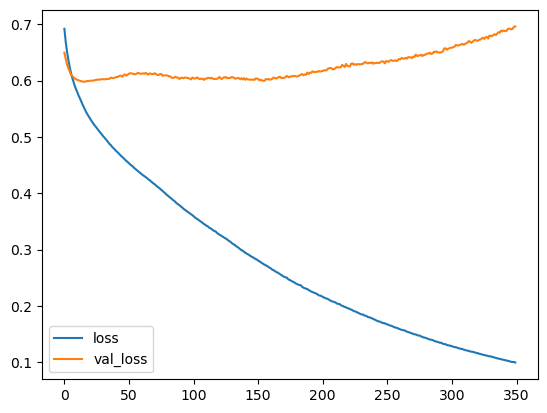

In [10]:
val_loss=pd.DataFrame(ann.history.history)
val_loss.plot()

In [11]:
ypred = ann.predict(xtest)
ypred = ypred>0.5

4/4 [==============================] - 0s 0s/step


In [12]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        75
           1       1.00      0.69      0.82        29

    accuracy                           0.91       104
   macro avg       0.95      0.84      0.88       104
weighted avg       0.92      0.91      0.91       104



In [13]:
early= EarlyStopping(monitor='val_loss',mode='min',patience=20)

In [14]:
ann=Sequential()
ann.add(Dense(units=6,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=250)

Epoch 1/250
13/13 [==============================] - 1s 9ms/step - loss: 0.6445 - val_loss: 0.6206
Epoch 2/250
13/13 [==============================] - 0s 3ms/step - loss: 0.6302 - val_loss: 0.6158
Epoch 3/250
13/13 [==============================] - 0s 3ms/step - loss: 0.6183 - val_loss: 0.6116
Epoch 4/250
13/13 [==============================] - 0s 2ms/step - loss: 0.6084 - val_loss: 0.6076
Epoch 5/250
13/13 [==============================] - 0s 3ms/step - loss: 0.5984 - val_loss: 0.6047
Epoch 6/250
13/13 [==============================] - 0s 3ms/step - loss: 0.5908 - val_loss: 0.6024
Epoch 7/250
13/13 [==============================] - 0s 3ms/step - loss: 0.5835 - val_loss: 0.6015
Epoch 8/250
13/13 [==============================] - 0s 3ms/step - loss: 0.5763 - val_loss: 0.6005
Epoch 9/250
13/13 [==============================] - 0s 2ms/step - loss: 0.5704 - val_loss: 0.6000
Epoch 10/250
13/13 [==============================] - 0s 3ms/step - loss: 0.5645 - val_loss: 0.6012
Epoch 11/

In [15]:
ypred = ann.predict(xtest)
ypred = ypred>0.5

4/4 [==============================] - 0s 2ms/step


In [16]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        75
           1       1.00      0.07      0.13        29

    accuracy                           0.74       104
   macro avg       0.87      0.53      0.49       104
weighted avg       0.81      0.74      0.65       104



In [17]:
ann=Sequential()
ann.add(Dense(units=6,activation='relu'))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=250)

Epoch 1/250
13/13 [==============================] - 1s 10ms/step - loss: 1.0054 - val_loss: 0.8773
Epoch 2/250
13/13 [==============================] - 0s 2ms/step - loss: 0.9016 - val_loss: 0.8392
Epoch 3/250
13/13 [==============================] - 0s 3ms/step - loss: 0.9617 - val_loss: 0.8083
Epoch 4/250
13/13 [==============================] - 0s 3ms/step - loss: 0.9028 - val_loss: 0.7814
Epoch 5/250
13/13 [==============================] - 0s 3ms/step - loss: 0.8191 - val_loss: 0.7576
Epoch 6/250
13/13 [==============================] - 0s 4ms/step - loss: 0.7936 - val_loss: 0.7371
Epoch 7/250
13/13 [==============================] - 0s 3ms/step - loss: 0.7676 - val_loss: 0.7207
Epoch 8/250
13/13 [==============================] - 0s 3ms/step - loss: 0.7387 - val_loss: 0.7061
Epoch 9/250
13/13 [==============================] - 0s 3ms/step - loss: 0.7421 - val_loss: 0.6927
Epoch 10/250
13/13 [==============================] - 0s 3ms/step - loss: 0.7437 - val_loss: 0.6823
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.4834 - val_loss: 0.5436
Epoch 84/250
13/13 [==============================] - 0s 3ms/step - loss: 0.5029 - val_loss: 0.5431
Epoch 85/250
13/13 [==============================] - 0s 4ms/step - loss: 0.4661 - val_loss: 0.5404
Epoch 86/250
13/13 [==============================] - 0s 4ms/step - loss: 0.4771 - val_loss: 0.5387
Epoch 87/250
13/13 [==============================] - 0s 3ms/step - loss: 0.4934 - val_loss: 0.5377
Epoch 88/250
13/13 [==============================] - 0s 3ms/step - loss: 0.4887 - val_loss: 0.5376
Epoch 89/250
13/13 [==============================] - 0s 4ms/step - loss: 0.4863 - val_loss: 0.5369
Epoch 90/250
13/13 [==============================] - 0s 3ms/step - loss: 0.4825 - val_loss: 0.5362
Epoch 91/250
13/13 [==============================] - 0s 3ms/step - loss: 0.4810 - val_loss: 0.5366
Epoch 92/250
13/13 [==============================] - 0s 3ms/step - loss: 0.4805 - val_loss: 0.5378
Epoch 93/250


<AxesSubplot:>

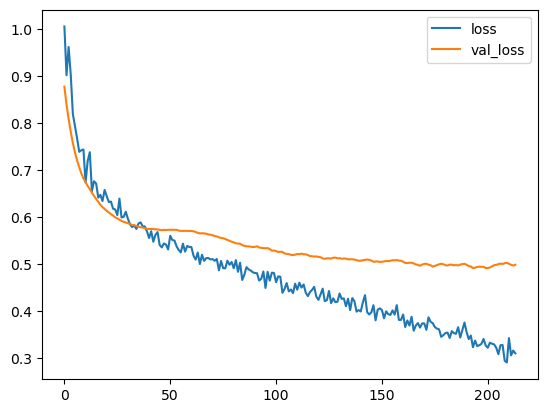

In [18]:
early_drop_loss=pd.DataFrame(ann.history.history)
early_drop_loss.plot()